In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Punto 1

16.3-2. Suponga que una red de comunicaciones transmite dígi-
tos binarios, 0 o 1, y que cada dígito se transmite 10 veces suce-
sivas. Durante cada transmisión, la probabilidad de que ese dígito
se transmita correctamente es de 0.995. En otras palabras, existe
una probabilidad de 0.005 de que el dígito transmitido se registre
con el valor opuesto al final de la transmisión. Para cada transmi-
sión después de la primera, el dígito transmitido es el que se regis-
tra al final de la transmisión anterior. Si X0 denota el dígito binario
que entra al sistema, X1 el dígito binario que se apunta después de
la primera transmisión, X2 el dígito binario que se anota después
de la segunda transmisión, . . ., entonces {Xn} es una cadena de
Markov.


a) Determine la matriz de transición (de un paso).

b) Utilice el IOR Tutorial para encontrar la matriz de transición
de 10 pasos P(10). Utilice este resultado para identificar la pro-
babilidad de que un dígito que entra a la red se registre correc-
tamente después de la última transmisión.


c) Suponga que la red se rediseña para mejorar la probabilidad de
la exactitud de una sola transmisión de 0.995 a 0.998. Repita
el inciso b) para encontrar la nueva probabilidad de que un
dígito que entra a la red se registre correctamente después de
la última transmisión

In [3]:
""" Punto a """

"""
      0     1
0 0.995 0.005
1 0.005 0.995

"""
print("Punto a")
transmision = np.array([
    [0.995,0.005],
    [0.005,0.995]
])
print(transmision)
""" Punto b """
print("Punto b")
aux = transmision
for i in range(9):
    aux = np.dot(aux,transmision)

print(aux)

""" Punto c """
transmision = np.array([
    [0.998, 0.002],
    [0.002, 0.998]
])
print("Punto c")
aux = transmision
for i in range(9):
    aux = np.dot(aux, transmision)

print(aux)


Punto a
[[0.995 0.005]
 [0.005 0.995]]
Punto b
[[0.95219104 0.04780896]
 [0.04780896 0.95219104]]
Punto c
[[0.98035619 0.01964381]
 [0.01964381 0.98035619]]


## Punto 2

16.5-4. La cervecería más importante de la costa oeste (denotada
con la letra A) ha contratado a un experto en IO para que analice su
posición en el mercado. En especial, la empresa está preocupada por
las actividades de su mayor competidor (denotada con la letra B). El
analista piensa que el cambio de marca se puede modelar como una
cadena de Markov que incluya tres estados: los estados A y B representan a los clientes que beben cerveza que producen las mencionadas cervecerías y el estado C representa todas las demás marcas. Los datos se toman cada mes y el analista construye la siguiente matriz de transición (de un paso) con datos históricos.

In [10]:
empresas = np.array([
    [0.70, 0.20, 0.10],
    [0.20, 0.75, 0.05],
    [0.10, 0.10, 0.80]
])

aux = []
aux.append(empresas)
count = 0

for i in range(1,100):
    
    aux.append(np.dot(aux[i-1], empresas))
    
    if np.array_equal(np.round(aux[i],6), np.round(aux[i-1],6)):
        count += 1
    
    if count == 10:
        break

# print(i)
# print(count)
# print(aux[i])

print("Estado estable")
estadoEstable = aux[-1][-1]
print(estadoEstable*100)
    

Estado estable
[34.61538401 38.46153768 26.92307831]


## Punto 3

16.5-5. Considere el siguiente problema de inventario de sangre al
que se enfrenta un hospital. Se tiene necesidad de un tipo raro de
sangre, como AB, Rh negativo. La demanda D (en pintas) durante un
periodo de tres días está dada por

P{D = 0} = 0.4,     P{D = 1} = 0.3, 

P{D = 2} = 0.2,     P{D = 3} = 0.1.


Observe que la demanda esperada es de una pinta, puesto que E(D)=
0.3(1) + 0.2(2) + 0.1(3) = 1. Suponga que se surte sangre cada tres
días. El hospital propone una política para recibir una pinta en cada
entrega y usar primero la más antigua. Si se requiere más sangre de la que hay en el banco se hace un pedido de emergencia a un alto costo. La sangre se descarta si en 21 días no se ha usado. Denote el estado del sistema como el número de pintas en inventario exactamente después de una entrega. Observe que debido a la política de descartar la sangre, el estado más grande posible es 7.

a) Construya la matriz de transición (de un paso) para esta cadena
de Markov.

b) Encuentre las probabilidades de estado estable para los estados de esta cadena de Markov.

c) Use los resultados de b) para encontrar la probabilidad de estado
estable de que sea necesario descartar una pinta durante un periodo de tres días. (Sugerencia: Si se usa primero la sangre más vieja, una pinta tiene 21 días sólo si el estado es 7 y entonces D 5 0.)

d) Utilice los resultados de b) para encontrar la probabilidad de
estado de que se necesite una entrega de emergencia durante los
tres días entre entregas normales.


In [54]:
pD0 = 0.4
pD1 = 0.3
pD2 = 0.2
pD3 = 0.1

print(" Punto a")
transicion = np.array([
    [0.6, 0.4, 0,0,0,0,0],
    [0.3, 0.3, 0.4,0,0,0,0],
    [0.1, 0.2, 0.3,0.4,0,0,0],
    [0,0.1, 0.2,0.3,0.4,0,0],
    [0,0,0.1,0.2,0.3,0.4,0],
    [0,0,0,0.1,0.2,0.3,0.4],
    [0,0,0,0,0.1,0.2,0.7],
])
print(transicion)

aux = []
aux.append(transicion)
count = 0

for i in range(1, 100):

    aux.append(np.dot(aux[i-1], transicion))

    if np.array_equal(np.round(aux[i], 6), np.round(aux[i-1], 6)):
        count += 1

    if count == 10:
        break

# print(i)
# print(count)
# print(aux[i])

print("Punto b")
estadoEstable = aux[-1][-1]
print(estadoEstable)

print("Punto c")
print(estadoEstable[-1]*pD0)

print("Punto d")
print(estadoEstable[1]*(pD2+pD3)+estadoEstable[2]*pD3)


 Punto a
[[0.6 0.4 0.  0.  0.  0.  0. ]
 [0.3 0.3 0.4 0.  0.  0.  0. ]
 [0.1 0.2 0.3 0.4 0.  0.  0. ]
 [0.  0.1 0.2 0.3 0.4 0.  0. ]
 [0.  0.  0.1 0.2 0.3 0.4 0. ]
 [0.  0.  0.  0.1 0.2 0.3 0.4]
 [0.  0.  0.  0.  0.1 0.2 0.7]]
Punto b
[0.13888301 0.13884276 0.13901684 0.1383447  0.14106435 0.13021815
 0.17363018]
Punto c
0.0694520734190706
Punto d
0.05555451259314656


## Revisar el algoritmo Hastings-Metropolis e implementar un ejemplo.

In [1]:
def metropolis(func, steps=10000):
    
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)

    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x

    return muestras


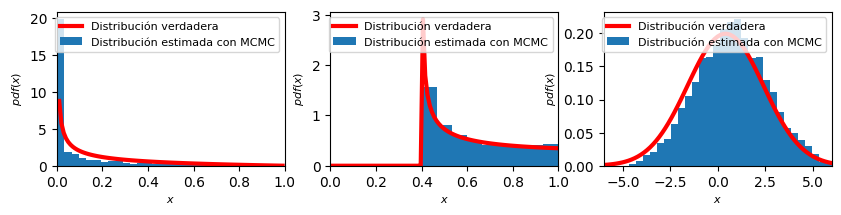

In [47]:
funciones = [stats.beta(0.4, 2), stats.arcsine(0.4, 2), stats.norm(0.4, 2)]

plt.figure(figsize=(10, 2))
for i in range(len(funciones)):
    plt.subplot(1, 3, i+1)
    func = funciones[i]
    samples = metropolis(func=func, steps=10000)
    x = np.linspace(0.01, .99, 100)
    y = func.pdf(x)
    plt.xlim(0, 1)
    if i == 2:
        x = np.linspace(-6, 10, 100)
        y = func.pdf(x)
        plt.xlim(-6, 6)
        
    plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
    plt.hist(samples, bins=30, density=True, stacked=True, label='Distribución estimada con MCMC')
    plt.xlabel('$x$', fontsize=8)
    plt.ylabel('$pdf(x)$', fontsize=8)
    plt.legend(fontsize=8)
plt.show()


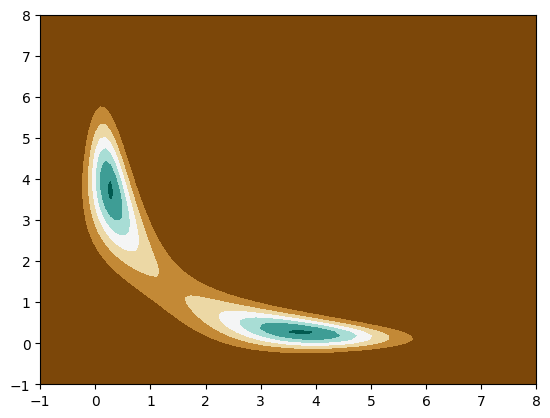

In [50]:
def f(x, y): return np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y)/2.)


xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg, yg = np.meshgrid(xx, yy)
z = f(xg.ravel(), yg.ravel())
z2 = z.reshape(xg.shape)
plt.contourf(xg, yg, z2, cmap='BrBG')


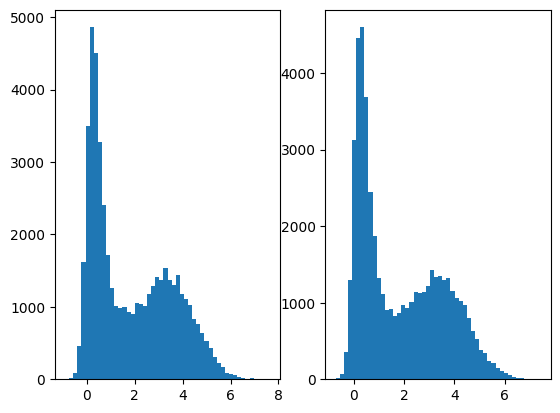

In [59]:
N = 50000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 1.
y[0] = 6.
def sig(z, i): return np.sqrt(1./(1.+z[i]*z[i]))


def mu(z, i): return 4./(1.+z[i]*z[i])


for i in range(1, N, 2):
    sig_x = sig(y, i-1)
    mu_x = mu(y, i-1)
    x[i] = np.random.normal(mu_x, sig_x)
    y[i] = y[i-1]

    sig_y = sig(x, i)
    mu_y = mu(x, i)
    y[i+1] = np.random.normal(mu_y, sig_y)
    x[i+1] = x[i]

plt.figure()
plt.subplot(1, 2, 1)
a = plt.hist(x, bins=50)
plt.subplot(1, 2, 2)
b = plt.hist(y, bins=50)


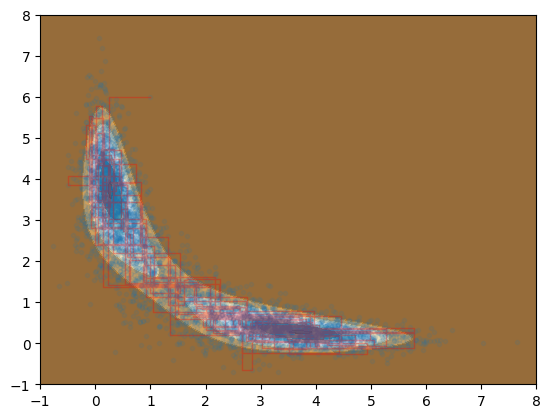

In [60]:
plt.contourf(xg, yg, z2, alpha=0.8, cmap='BrBG')
plt.plot(x[::10],y[::10], '.', alpha=0.1)
plt.plot(x[:300],y[:300], c='r', alpha=0.3, lw=1)